This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [22]:
yaml_file = '../events/derna_flood_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'derna_flood_2023',
 'bounds': [10.97631339, 43.81441325, 11.15319728, 43.98650075],
 'event_date': '2023-11-09',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [15, 168],
 'mgrs_tiles': ['32TPP'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSR696',
 'links': ['https://rapidmapping.emergency.copernicus.eu/EMSR696/download',
  'https://apnews.com/article/libya-derna-floods-5d29f54b47bcc6daa6802e5f9c8f2d10']}

In [25]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/derna_flood_2023/EMSR696_AOI01_GRA_PRODUCT_observedEventA_v1.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,5-Flood,Flash flood,Photo-interpretation,Flooded area,4,0.140699,"POLYGON ((22.63312 32.76671, 22.63298 32.76667..."
1,5-Flood,Flash flood,Photo-interpretation,Flooded area,4,0.149789,"POLYGON ((22.65015 32.76139, 22.64993 32.76138..."
2,5-Flood,Flash flood,Photo-interpretation,Flooded area,4,3.159541,"POLYGON ((22.52495 32.80071, 22.52464 32.80063..."
3,5-Flood,Flash flood,Photo-interpretation,Flooded area,4,5.546772,"POLYGON ((22.55975 32.80014, 22.55994 32.80013..."
4,5-Flood,Flash flood,Photo-interpretation,Flooded area,4,4.997236,"POLYGON ((22.56581 32.78939, 22.56490 32.78762..."


<Axes: >

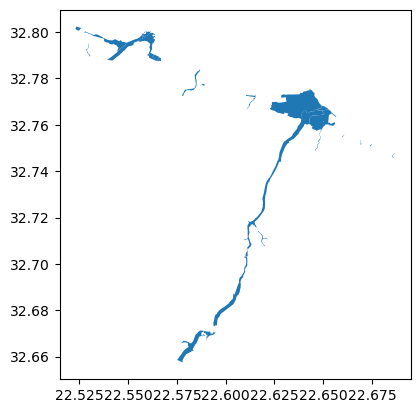

In [26]:
df_event.plot()

In [27]:
df_event.total_bounds

array([22.52302437, 32.65748484, 22.68674853, 32.80244308])

In [28]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,derna_flood_2023,2023-11-09,Copernicus Copernicus EMSR696,"MULTIPOLYGON (((22.58865 32.66955, 22.58890 32..."


In [29]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [30]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')